In [1]:
using Turing, Flux, Plots, Random, ReverseDiff,CSV,DataFrames,Distributions,FillArrays,StatsPlots,LinearAlgebra
Turing.setprogress!(false);
Turing.setadbackend(:reversediff)

┌ Info: [Turing]: progress logging is disabled globally
└ @ Turing /Users/aaaa/.julia/packages/Turing/x9TKu/src/Turing.jl:23
┌ Info: [AdvancedVI]: global PROGRESS is set as false
└ @ AdvancedVI /Users/aaaa/.julia/packages/AdvancedVI/hVQ2g/src/AdvancedVI.jl:15


:reversediff

In [2]:

begin
    data=CSV.read("w2021-1.csv",DataFrame,header=6)
    data0=CSV.read("w2022-1.csv",DataFrame,header=6)
    data1=CSV.read("w2020.csv",DataFrame,header=6)
    dataset2021=Array(transpose(Matrix(data[1:365,[5]])))
    dataset2022=Array(transpose(Matrix(data0[1:365,[5]])))
    dataset2020=Array(transpose(Matrix(data1[1:365,[4]])))
    x0=Array(transpose(dataset2020[1:364]))
    y0=Array(transpose(dataset2020[2:365]))
    x1=Array(transpose(dataset2021[1:364]))
    y1=Array(transpose(dataset2021[2:365]))
    x2=Array(transpose(dataset2022[1:364]))
    y2=Array(transpose(dataset2022[2:365]))
end

1×364 Matrix{Float64}:
 7.9  10.5  12.4  8.7  2.6  8.4  9.5  …  11.4  12.3  11.9  13.7  11.8  10.5

In [3]:
xx=data[1:364,2]
yy=xx=data[2:365,2]
x1=Array(transpose(dataset2021[1:364]))
y1=Array(transpose(dataset2021[2:365]))
x1n=(x1 .-mean(x1))./std(x1)
y1n=(y1 .-mean(y1))./std(y1)
x1s=x1./norm(x1)
y1s=y1./norm(y1)

1×364 Matrix{Float64}:
 0.0249864  0.0194339  0.0263745  …  0.0205907  0.0335466  0.0138813

In [51]:
nn_initial = Chain(Dense(1, 3, tanh), Dense(3, 2, tanh), Dense(2, 1,tanh))
parameters_initial, reconstruct = Flux.destructure(nn_initial)
length(parameters_initial) 

17

In [69]:
@model function bayes_nn(xs, ts, nparameters, reconstruct; alpha=0.09)
    # Create the weight and bias vector.
    parameters ~ MvNormal(Zeros(nparameters), I / alpha)
    nn = reconstruct(parameters)
    preds = nn(xs)
    
    for i in 1:length(ts)
        ts[i] ~ Normal(preds[i],1)
    end
end;

In [70]:
theta = MCMCChains.group(ch, :parameters).value;

In [71]:
nn_forward(x, theta) = reconstruct(theta)(x)

nn_forward (generic function with 1 method)

In [98]:
x1_range = collect(range(5; stop=37, length=364))

364-element Vector{Float64}:
  5.0
  5.088154269972452
  5.176308539944904
  5.264462809917355
  5.352617079889807
  5.440771349862259
  5.528925619834711
  5.6170798898071626
  5.705234159779614
  5.793388429752066
  5.881542699724518
  5.96969696969697
  6.0578512396694215
  ⋮
 36.03030303030303
 36.11845730027548
 36.20661157024794
 36.294765840220386
 36.382920110192835
 36.47107438016529
 36.55922865013774
 36.647382920110196
 36.735537190082646
 36.823691460055095
 36.91184573002755
 37.0

In [85]:
Array(x1_range')

1×364 Matrix{Float64}:
 1.0  2.0  3.0  4.0  5.0  6.0  7.0  8.0  …  360.0  361.0  362.0  363.0  364.0

In [101]:
re=[nn_forward(x1,theta[i,:]) for i in 1:1000]

1000-element Vector{Matrix{Float64}}:
 [0.9999996855570322 0.9999996855570356 … 0.999999685556952 0.9999996855570421]
 [0.9999997135436344 0.9999997135436409 … 0.9999997135434874 0.9999997135436544]
 [0.9999996938128098 0.9999996938128399 … 0.9999996938122174 0.9999996938129073]
 [0.9999997161745099 0.9999997161745278 … 0.9999997161741442 0.9999997161745671]
 [0.9999997442203379 0.9999997442203707 … 0.9999997442197215 0.9999997442204469]
 [0.9999997241414662 0.9999997241415824 … 0.9999997241396622 0.9999997241418994]
 [0.9999996942573238 0.9999996942576258 … 0.9999996942531861 0.9999996942585418]
 [0.9999997568661292 0.9999997568665815 … 0.9999997568604676 0.9999997568680592]
 [0.9999997888359891 0.9999997888360022 … 0.9999997888357355 0.999999788836032]
 [0.9999997165377699 0.9999997165378086 … 0.9999997165370952 0.9999997165379043]
 [0.9999997219237748 0.9999997219238137 … 0.999999721923076 0.9999997219239074]
 [0.9999997069996022 0.999999706999616 … 0.9999997069993223 0.999999706999

In [91]:
mean(mean(re).*x2)

21.170203547670432

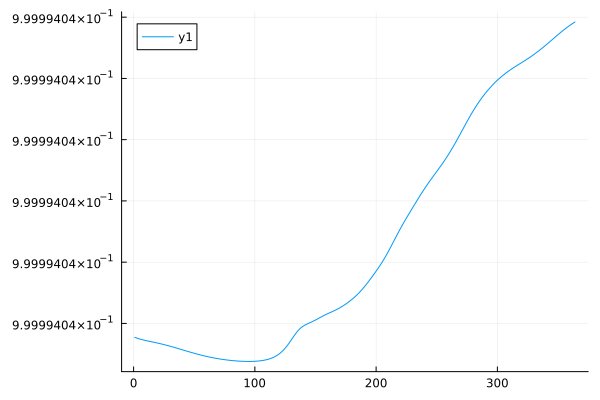

In [100]:
plot(mean(re)')

In [104]:
mean(re)

1×364 Matrix{Float64}:
 0.999994  0.999994  0.999994  0.999994  …  0.999994  0.999994  0.999994

In [113]:
e=mean(mean(re).*x1)

21.420476779644485

In [125]:
re1=[nn_forward(x1.^2,theta[i,:]) for i in 1:1000]

1000-element Vector{Matrix{Float64}}:
 [0.9999996855570422 0.9999996855570422 … 0.9999996855570422 0.9999996855570422]
 [0.9999997135436545 0.9999997135436545 … 0.9999997135436545 0.9999997135436545]
 [0.9999996938129081 0.9999996938129081 … 0.9999996938129081 0.9999996938129081]
 [0.9999997161745674 0.9999997161745674 … 0.9999997161745674 0.9999997161745674]
 [0.9999997442204479 0.9999997442204479 … 0.9999997442204479 0.9999997442204479]
 [0.9999997241419067 0.9999997241419067 … 0.9999997241419067 0.9999997241419067]
 [0.9999996942585725 0.9999996942585725 … 0.9999996942585725 0.9999996942585725]
 [0.9999997568681214 0.9999997568681214 … 0.9999997568681214 0.9999997568681214]
 [0.9999997888360324 0.9999997888360324 … 0.9999997888360324 0.9999997888360324]
 [0.9999997165379059 0.9999997165379059 … 0.9999997165379059 0.9999997165379059]
 [0.9999997219239087 0.9999997219239087 … 0.9999997219239087 0.9999997219239087]
 [0.9999997069996468 0.9999997069996468 … 0.9999997069996468 0.99999970

In [133]:
v=sqrt(mean(mean(re1).* (x1.^2)) -e^2)

7.390886317397108

In [134]:
rand(Normal(e,v),364)

364-element Vector{Float64}:
 20.627533803894856
 30.39194586060871
 17.140194061042124
 14.139230031667328
 27.370300421218083
 30.09319920359202
 26.701841467892386
 16.17333539603864
 25.428267530735393
 30.773462385931488
 21.431345875251374
 22.213904428501305
 25.871740296396002
  ⋮
 34.397856757148105
 22.290103468013527
 34.91172198220469
 25.32296558612133
 21.76520256575282
 20.218834237204558
 32.995514608661956
 19.739820461094368
 20.031363776361843
 27.509842189609323
 19.51829365503833
 23.062002386751242

In [136]:
using Distributions

In [ ]:
Mv()

In [140]:
quantile(Normal(e,v),[0.025])

1-element Vector{Float64}:
 6.934605783716245

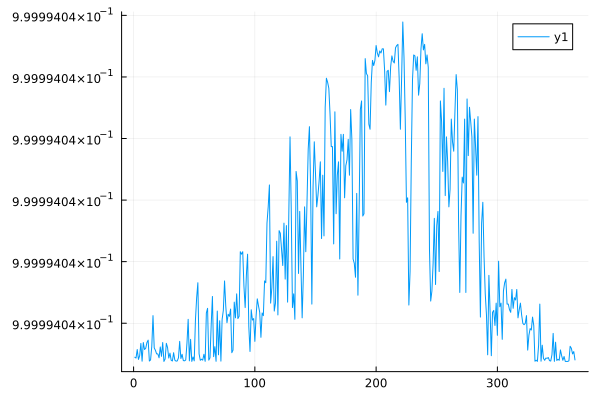

In [110]:
plot(y1')
plot(mean(re)')

In [77]:
logmean(re).*sqrt(pi*2)

1×364 Matrix{Float64}:
 2.50661  2.50661  2.50661  2.50661  …  2.50661  2.50661  2.50661  2.50661

In [96]:
findmin(x1),findmax(x1)

((5.7, CartesianIndex(1, 12)), (36.8, CartesianIndex(1, 222)))

In [97]:
37-5

32

In [75]:
log.(mean(re).*sqrt(pi*2))

1×364 Matrix{Float64}:
 0.918933  0.918933  0.918933  0.918933  …  0.918933  0.918933  0.918933

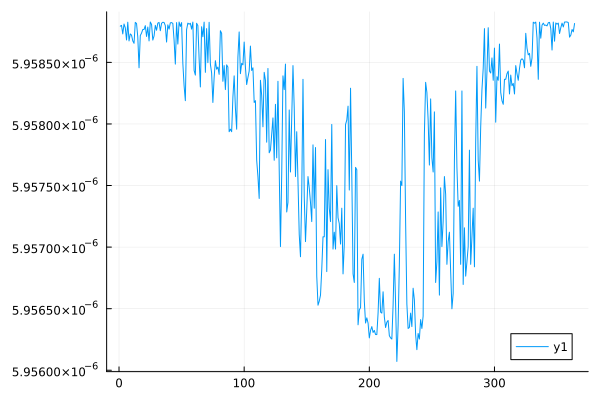

In [78]:
plot((-log.(mean(re)))')

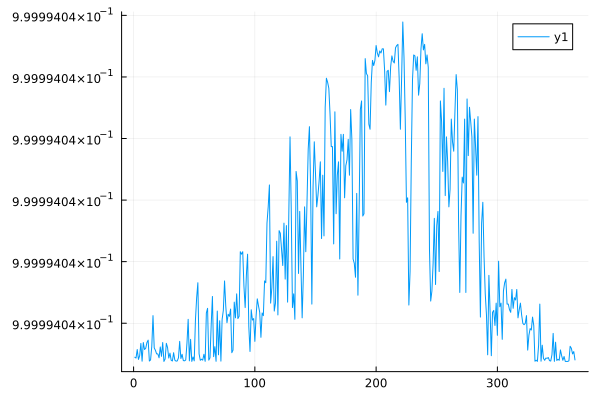

In [79]:
plot(mean(re)')

In [141]:
@model function bayes_nn(xs, ts, nparameters, reconstruct; alpha=0.09)
    # Create the weight and bias vector.
    parameters ~ MvNormal(Zeros(nparameters), I / alpha)
    nn = reconstruct(parameters)
    preds = nn(xs)
    sig ~ LogNormal(0.0, 1.0)
    
    ts~ MvNormal(vec(preds),sig.*I)
  
end;

In [184]:
rand(filldist(InverseGamma(2,3),17))

17-element Vector{Float64}:
 3.1901126954800167
 1.8231506633269392
 1.1014759948761852
 0.8083180872224851
 2.9604739652492698
 1.8603671340960828
 0.7715935809562436
 0.9558525119617012
 6.304741097756766
 1.569856400792623
 2.7798943291649114
 1.3865800845189244
 1.2482820485185195
 2.0468596343850773
 1.3108984118779363
 1.0564760929268076
 4.212455263703227

In [193]:
rand(Normal(0,10),10)

10-element Vector{Float64}:
  -8.15885203676784
  -8.149136664453104
   0.893308930436215
  33.68666765065171
 -15.52857380679759
   0.8593829228686596
  20.230320046982765
 -10.32778177569221
  14.264281981833244
   5.608469338071468

In [189]:
@model function bayes_nn(xs, ts, nparameters, reconstruct; alpha=0.09)
    # Create the weight and bias vectorInverseGamma.
    parameters ~ filldist((2,3),nparameters,1)
    nn = reconstruct(parameters)
    preds = nn(xs)
    sig ~ LogNormal(0.0, 1.0)
    
    for i in 1:length(ts)
        ts[i] ~ Normal(preds[i],sig)
    end
  
end;

In [142]:
nn_initial(x1)

1×364 Matrix{Float64}:
 0.676761  0.676756  0.676864  0.676748  …  0.676792  0.676825  0.676734

In [285]:
@model function bayes_nn(xs, ts, nparameters, reconstruct; alpha=0.09)
    # Create the weight and bias vector.
    #sig ~InverseGamma(2,3)
    parameters ~ MvNormal(Zeros(nparameters), I /0.09)
    nn = reconstruct(parameters)
    preds = nn(xs)
    
    for i in 1:length(ts)
        ts[i] ~ Normal(preds[i],1)
    end
end;

In [291]:
nn_initial = Chain(Dense(1, 3, ), Dense(3, 2, ), Dense(2, 1,))
parameters_initial, reconstruct = Flux.destructure(nn_initial)
length(parameters_initial) 

N = 1000
ch = sample(
    bayes_nn(x1, y1, length(parameters_initial), reconstruct), HMC(0.05, 1), N
);

In [292]:
theta = MCMCChains.group(ch, :parameters).value;

In [213]:
sig = MCMCChains.group(ch, :sig).value;

In [254]:
nn_forward(x, theta) = reconstruct(theta)(x)

nn_forward (generic function with 1 method)

In [277]:
function nn_predict(x, theta, num)
    return mean([nn_forward(x, theta[i, :]) for i in 1:1:num])
end;

In [282]:
nn_predict(x1,theta,1000)

1×364 Matrix{Float64}:
 27.0779  27.0779  27.0779  27.0779  …  27.0779  27.0779  27.0779  27.0779

In [246]:
nn_forward(x1,theta[50,:])

1×364 Matrix{Float64}:
 6.59805  6.59805  6.59805  6.59805  …  6.59805  6.59805  6.59805  6.59805

In [284]:
mean(re) == nn_predict(x1,theta,1000)

true

In [293]:
re=[nn_forward(x1,theta[i,:]) for i in 1:1:1000]

1000-element Vector{Matrix{Float64}}:
 [2143.700958869109 2208.274438971145 … 1799.3090649915835 3004.680693562923]
 [2143.700958869109 2208.274438971145 … 1799.3090649915835 3004.680693562923]
 [2143.700958869109 2208.274438971145 … 1799.3090649915835 3004.680693562923]
 [2143.700958869109 2208.274438971145 … 1799.3090649915835 3004.680693562923]
 [2143.700958869109 2208.274438971145 … 1799.3090649915835 3004.680693562923]
 [2143.700958869109 2208.274438971145 … 1799.3090649915835 3004.680693562923]
 [2143.700958869109 2208.274438971145 … 1799.3090649915835 3004.680693562923]
 [2143.700958869109 2208.274438971145 … 1799.3090649915835 3004.680693562923]
 [2143.700958869109 2208.274438971145 … 1799.3090649915835 3004.680693562923]
 [2143.700958869109 2208.274438971145 … 1799.3090649915835 3004.680693562923]
 [2143.700958869109 2208.274438971145 … 1799.3090649915835 3004.680693562923]
 [2143.700958869109 2208.274438971145 … 1799.3090649915835 3004.680693562923]
 [2143.700958869109 2208.2

In [314]:
r1=[nn_forward(x2,theta[i,:]) for i in 1:1:1000]

1000-element Vector{Matrix{Float64}}:
 [1562.5396379507845 1584.06413131813 … 2832.4847466241595 2423.5193726445987]
 [1562.5396379507845 1584.06413131813 … 2832.4847466241595 2423.5193726445987]
 [1562.5396379507845 1584.06413131813 … 2832.4847466241595 2423.5193726445987]
 [1562.5396379507845 1584.06413131813 … 2832.4847466241595 2423.5193726445987]
 [1562.5396379507845 1584.06413131813 … 2832.4847466241595 2423.5193726445987]
 [1562.5396379507845 1584.06413131813 … 2832.4847466241595 2423.5193726445987]
 [1562.5396379507845 1584.06413131813 … 2832.4847466241595 2423.5193726445987]
 [1562.5396379507845 1584.06413131813 … 2832.4847466241595 2423.5193726445987]
 [1562.5396379507845 1584.06413131813 … 2832.4847466241595 2423.5193726445987]
 [1562.5396379507845 1584.06413131813 … 2832.4847466241595 2423.5193726445987]
 [1562.5396379507845 1584.06413131813 … 2832.4847466241595 2423.5193726445987]
 [1562.5396379507845 1584.06413131813 … 2832.4847466241595 2423.5193726445987]
 [1562.5396379

In [315]:
re1=mean(r1)

1×364 Matrix{Float64}:
 1562.54  1584.06  2143.7  2552.67  …  2531.14  2445.04  2832.48  2423.52

In [321]:
re2=(re1./norm(re1) .*(norm(x1)))

1×364 Matrix{Float64}:
 7.39039  7.4922  10.1391  12.0734  …  11.9716  11.5644  13.3969  11.4626

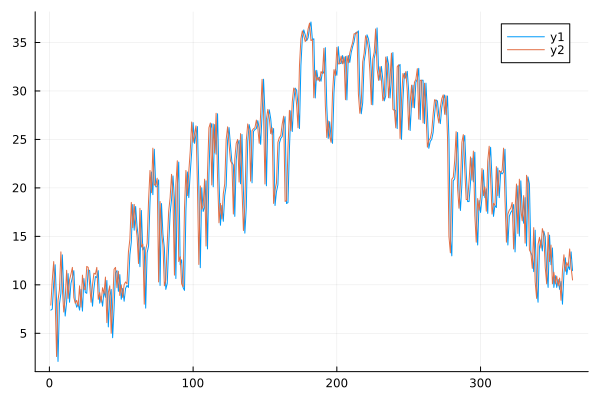

In [320]:
plot((re1./norm(re1) .*(norm(x1)))')
plot!(y2')

In [324]:
sum((re2.-y2).^2) /length(re2)

11.541430455218837

In [325]:
Flux.mse(re2,y2)

11.541430455218837

In [294]:
mean(re)

1×364 Matrix{Float64}:
 2143.7  2208.27  1691.69  2337.42  …  1627.11  1928.46  1799.31  3004.68

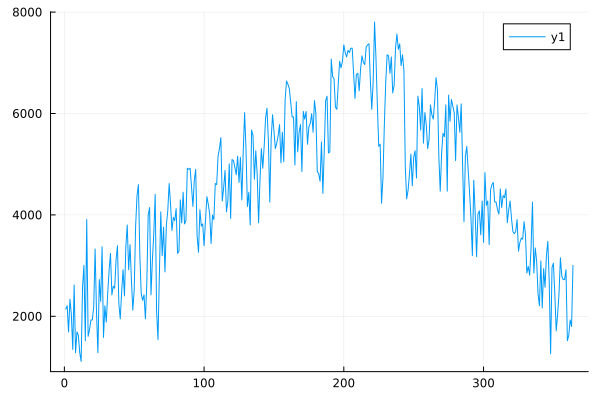

In [295]:
plot(mean(re)')

In [296]:
sum(mean(re).*y1)/(norm(mean(re))*norm(y1))

0.988834410897178

In [304]:
mean(re)./norm(mean(re))

1×364 Matrix{Float64}:
 0.0235678  0.0242777  0.0185984  …  0.0212014  0.0197816  0.0330334

In [301]:
(mean(re)./norm(re)).*norm(x1)

1×364 Matrix{Float64}:
 0.3222  0.331905  0.254262  0.351316  …  0.289848  0.270437  0.451605

In [306]:
res=mean(re)

1×364 Matrix{Float64}:
 2143.7  2208.27  1691.69  2337.42  …  1627.11  1928.46  1799.31  3004.68

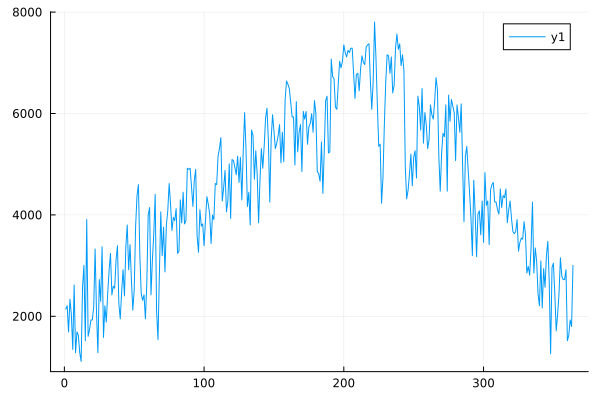

In [313]:
plot(res')

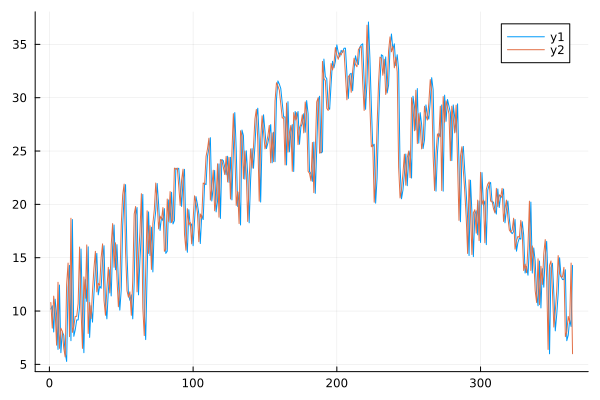

In [312]:
plot((res./norm(res).*norm(x1))')
plot!(y1')

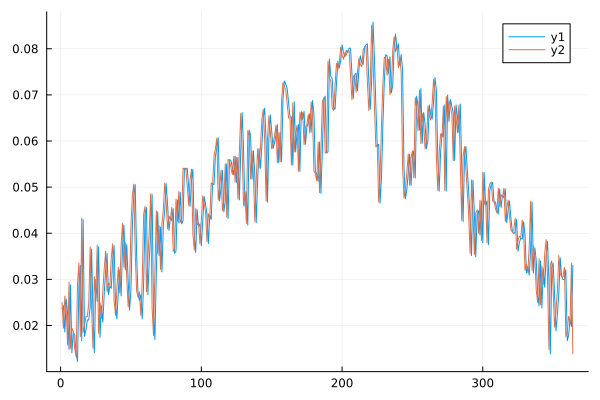

In [305]:
plot((mean(re)./norm(mean(re)))')
plot!((y1./norm(y1))')

In [219]:
mean(re)[2]

-1.207714278130402

In [ ]:
Normal

In [207]:
mean(re)

1×364 Matrix{Float64}:
 21.4192  21.4192  21.4192  21.4192  …  21.4192  21.4192  21.4192  21.4192

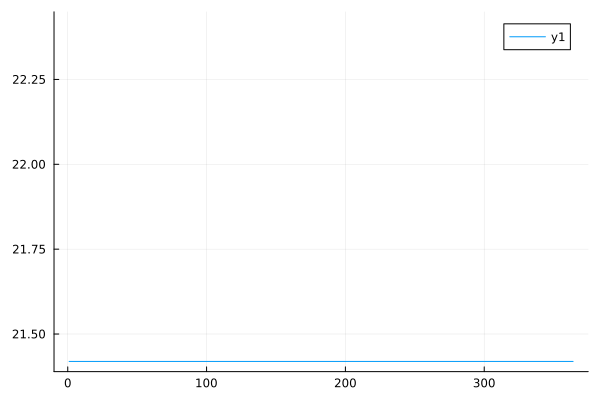

In [200]:
plot(mean(nn_forward(x1,theta[i,:]) for i in 1:1000)')

In [166]:
MvNormal(vec(nn_forward(x1,theta[500,:])),sig[500]*I)

IsoNormal(
dim: 364
μ: [-7.930405580866878, -7.930405580866877, -7.930405580867768, -7.930405580866877, -7.930405580866882, -7.930405580999521, -7.930405580866877, -7.930405581205783, -7.930405580867768, -7.930405580869153  …  -7.930405580866877, -7.930405580866877, -7.930405580866877, -7.930405580866877, -7.930405580866877, -7.930405580877748, -7.930405580869153, -7.930405580866905, -7.930405580867063, -7.930405580866877]
Σ: [0.18250106434418834 0.0 … 0.0 0.0; 0.0 0.18250106434418834 … 0.0 0.0; … ; 0.0 0.0 … 0.18250106434418834 0.0; 0.0 0.0 … 0.0 0.18250106434418834]
)


In [165]:
quantile(MvNormal(vec(nn_forward(x1,theta[500,:])),sig[500]*I,[0.975]))

LoadError: MethodError: no method matching MvNormal(::Vector{Float64}, ::UniformScaling{Float64}, ::Vector{Float64})
[0mClosest candidates are:
[0m  MvNormal(::AbstractVector{<:Real}, ::UniformScaling{<:Real}) at ~/.julia/packages/Distributions/gggmX/src/multivariate/mvnormal.jl:204
[0m  MvNormal([91m::ReverseDiff.TrackedArray{var"#s52", D, 1} where {var"#s52"<:Real, D}[39m, ::UniformScaling{<:Real}) at ~/.julia/packages/DistributionsAD/DmZL8/src/reversediff.jl:254
[0m  MvNormal([91m::Tracker.TrackedVector{<:Real}[39m, ::UniformScaling{<:Real}) at ~/.julia/packages/DistributionsAD/DmZL8/src/tracker.jl:469
[0m  ...

In [ ]:
[MV]

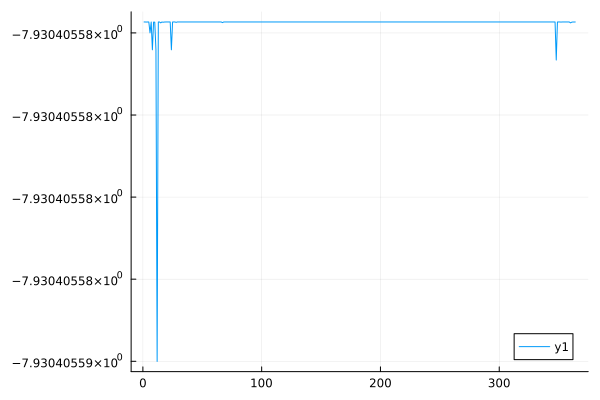

In [153]:
plot(nn_forward(x1,theta[500,:])')

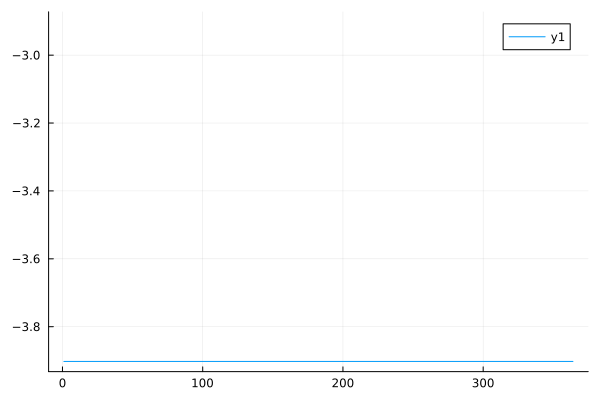

In [45]:
plot(nn_forward(x1,theta[100,:])')

In [132]:
_, i = findmax(ch[:lp])
i = i.I[1]
Z = [nn_forward([x1i], theta[i, :])[1] for x1i in x1]

1×364 Matrix{Float64}:
 21.4158  21.4161  21.4112  21.4168  …  21.4101  21.4141  21.4127  21.4184

In [142]:
z1=Z

1×364 Matrix{Float64}:
 21.4158  21.4161  21.4112  21.4168  …  21.4101  21.4141  21.4127  21.4184

In [135]:
sum(Z.*y1)/(norm(Z)*norm(y1))

0.9449783607859099

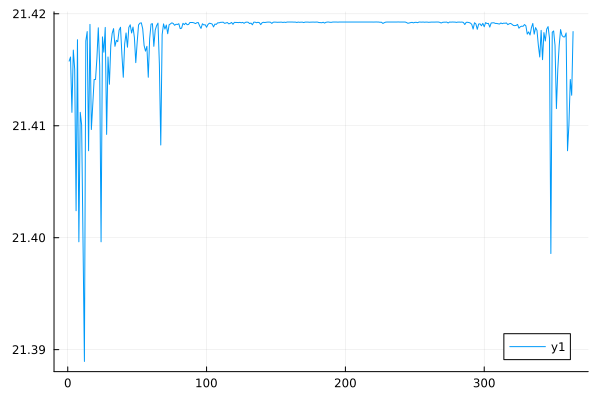

In [134]:
plot(transpose(Z))

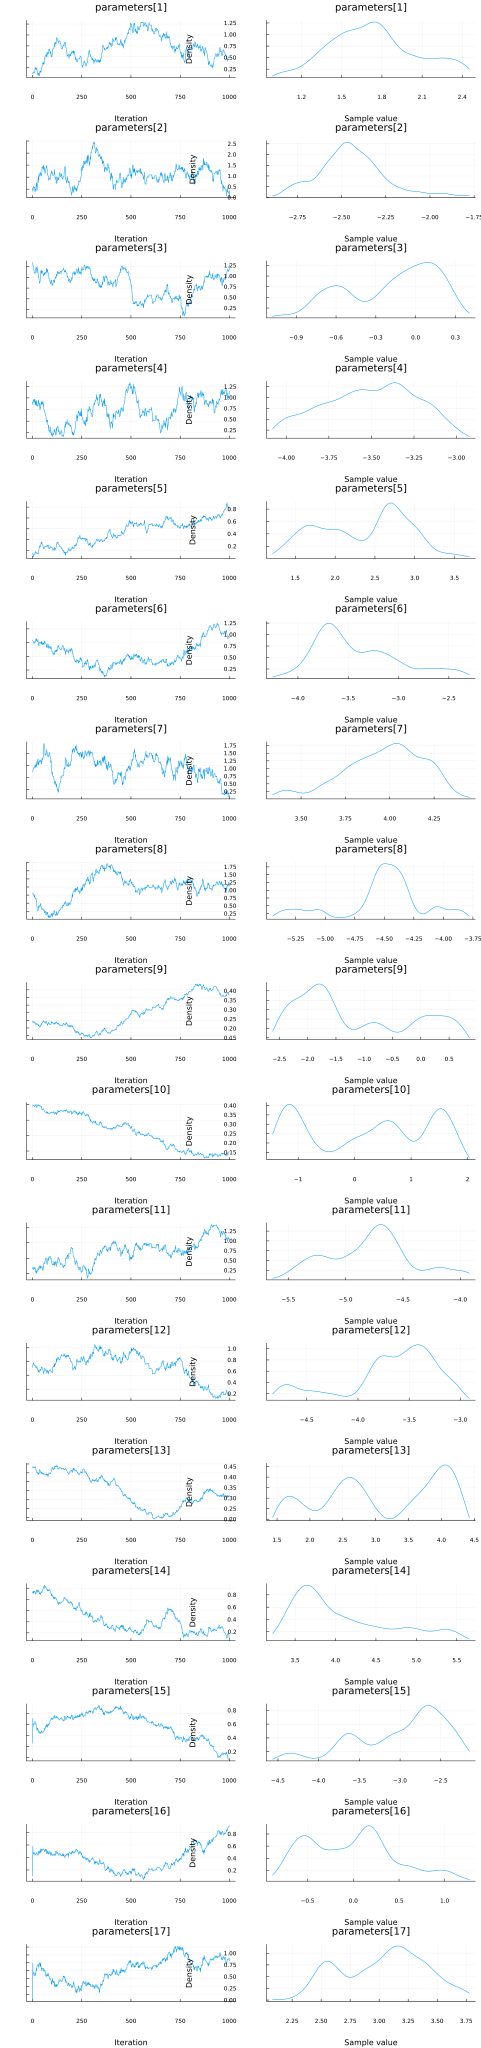

In [145]:
N = 1000
ch = sample(
    bayes_nn(x1s, y1s, length(parameters_initial), reconstruct), HMC(0.05, 1), N
);
plot(ch)

In [146]:
theta = MCMCChains.group(ch, :parameters).value;
nn_forward(x, theta) = reconstruct(theta)(x)
_, i = findmax(ch[:lp])
i = i.I[1]
Z = [nn_forward([x1i], theta[i, :])[1] for x1i in x1s]

1×364 Matrix{Float64}:
 0.0429341  0.0429202  0.0430304  …  0.0429802  0.0430077  0.0427448

In [147]:
z2=Z

1×364 Matrix{Float64}:
 0.0429341  0.0429202  0.0430304  …  0.0429802  0.0430077  0.0427448

In [155]:
sum(Z.*y1s)/(norm(Z)*norm(y1s))

0.9422577648425615

In [158]:
sum(Z.*norm(y1).*y1)/(norm(Z.*norm(y1))*norm(y1))

0.9422577648425617

In [157]:
norm(Z.*norm(y1))

349.5352437465053

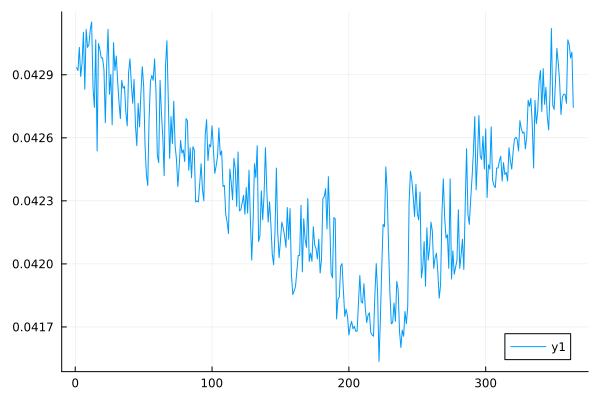

In [148]:
plot(transpose(Z),)

In [ ]:
Z = [nn_predict([x1i], theta,1000)[1] for x1i in x1n]

In [182]:
function nn_predict(x, theta, num)
    return mean([nn_forward(x, theta[i, :])[1] for i in 1:1:num])
end;

In [183]:
Z = [nn_predict([x1i], theta,1000)[1] for x1i in x1n]

1×364 Matrix{Float64}:
 -0.0567821  -0.0567822  -0.0567813  …  -0.0567818  -0.0567815  -0.0567833

In [190]:
z3

1×364 Matrix{Float64}:
 -0.515413  -0.515413  -0.515414  …  -0.515414  -0.515414  -0.515411

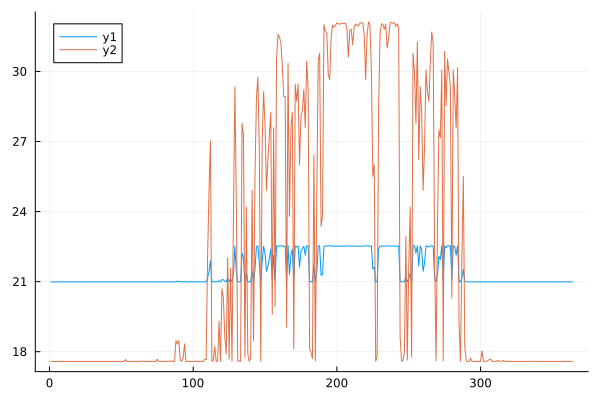

In [189]:
plot(((Z.*std(y1)).+mean(y1))')
plot!(((z3.*std(y1)).+mean(y1))')

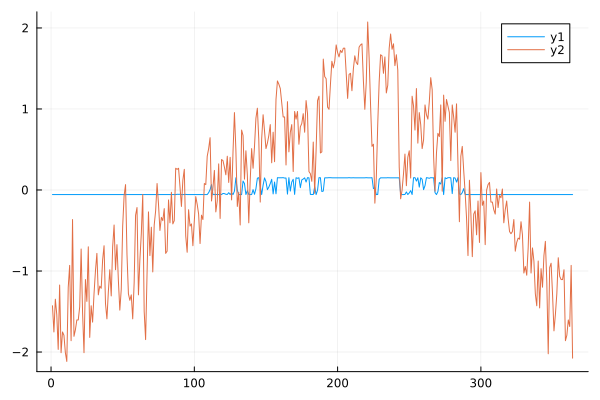

In [193]:
plot(Z')
plot!(y1n')

In [195]:
sum(Z.*y1n)/(norm(Z)*norm(y1n))

0.7472198072319656

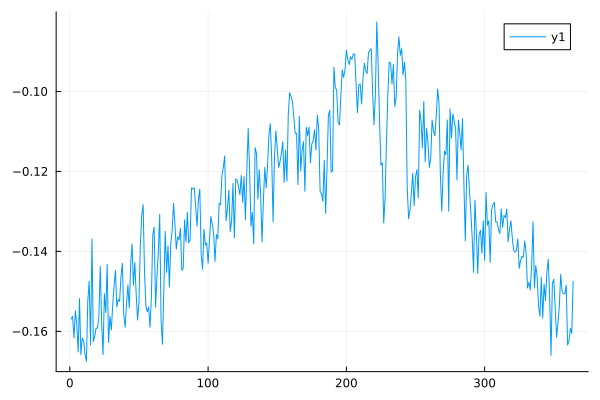

In [114]:
plot(transpose(Z))

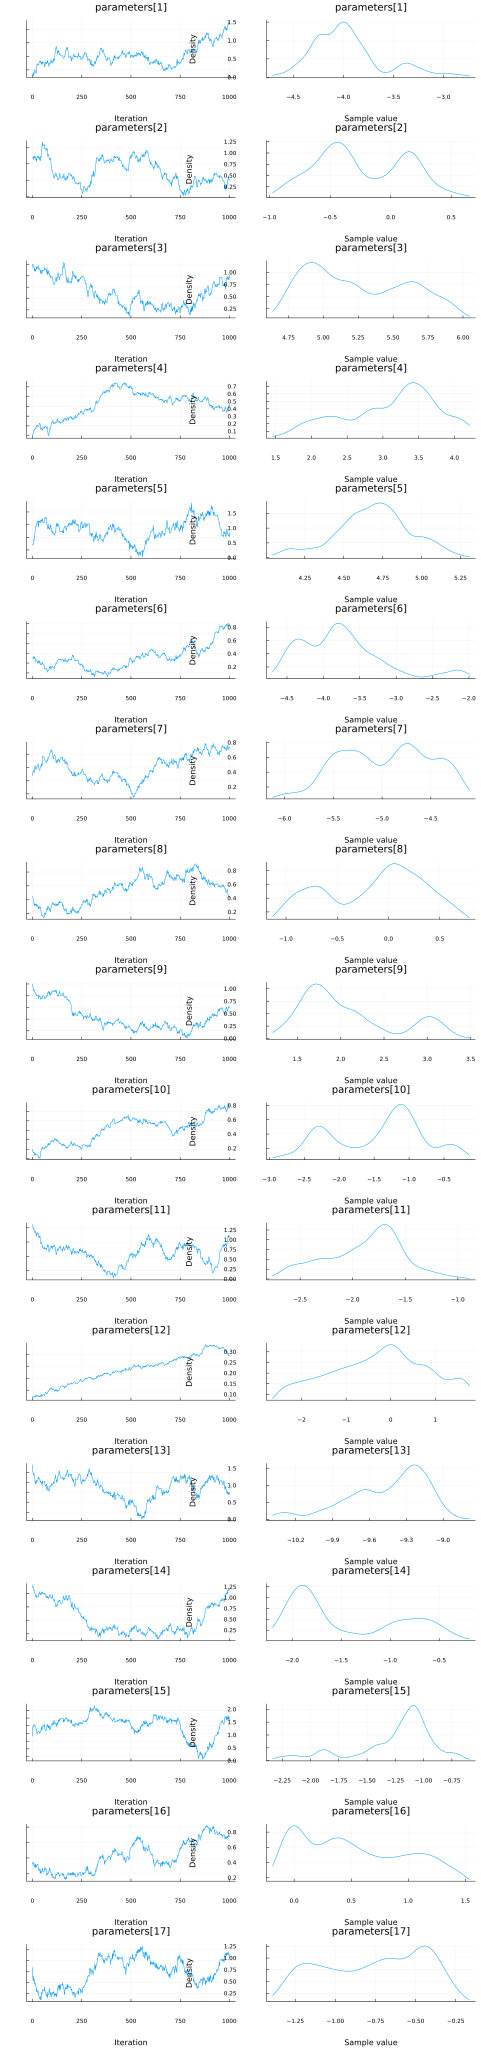

In [160]:
N = 1000
ch = sample(
    bayes_nn(x1n, y1n, length(parameters_initial), reconstruct), HMC(0.05, 1), N
);
plot(ch)

In [161]:
theta = MCMCChains.group(ch, :parameters).value;
nn_forward(x, theta) = reconstruct(theta)(x)
_, i = findmax(ch[:lp])
i = i.I[1]
Z = [nn_forward([x1i], theta[i, :])[1] for x1i in x1n]

1×364 Matrix{Float64}:
 -0.515413  -0.515413  -0.515414  …  -0.515414  -0.515414  -0.515411

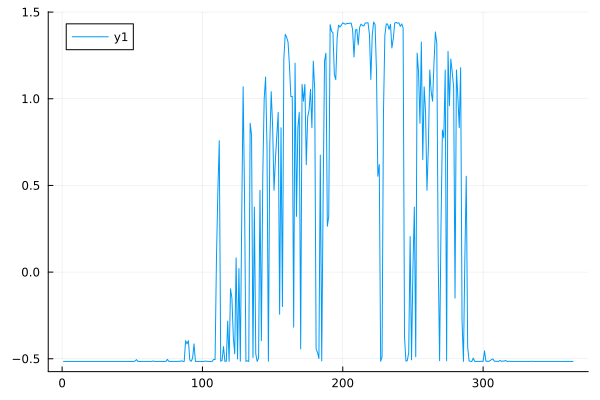

In [163]:
plot(Z')

In [164]:
sum(Z.*y1n)/(norm(Z)*norm(y1n))

0.7822667503573335

In [170]:
sum(((Z.*std(y1)).+mean(y1)).*y1)/(norm(y1)*norm(((Z.*std(y1)).+mean(y1))))

0.9792563321168879

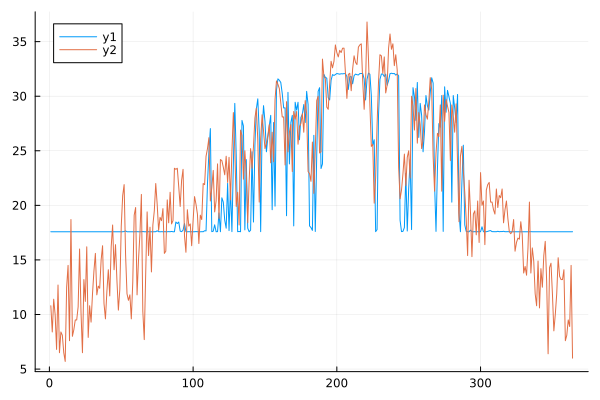

In [174]:
plot(((Z.*std(y1)).+mean(y1))')
plot!(y1')

In [196]:
@model function bayes_nn(xs, ts, nparameters, reconstruct; alpha=1)
    # Create the weight and bias vector.
    parameters ~ MvNormal(Zeros(nparameters), I / alpha)
    nn = reconstruct(parameters)
    preds = nn(xs)
    for i in 1:length(ts)
        ts[i] ~ Poisson(preds[i])
    end
end;

In [215]:
InverseGamma(2, 3)

InverseGamma{Float64}(
invd: Gamma{Float64}(α=2.0, θ=0.3333333333333333)
θ: 3.0
)


In [225]:
@model function bayes_nn(xs, ts, nparameters, reconstruct; alpha=1)
    # Create the weight and bias vector.
    parameters ~ MvNormal(Zeros(nparameters), I / alpha)
    nn = reconstruct(parameters)
    preds = nn(xs)
    for i in 1:length(ts)
        ts[i] ~ Gamma(preds[i])
    end
end;

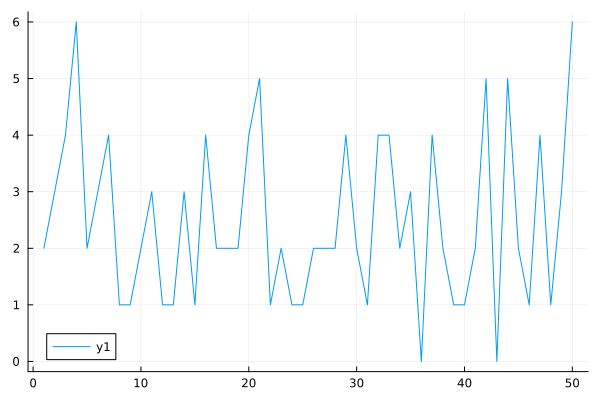

In [247]:
plot(rand(Poisson(exp(1)),50))

In [226]:
N = 1000
ch = sample(
    bayes_nn(x1, y1, length(parameters_initial), reconstruct), HMC(0.05, 1), N
);

plot(ch)

LoadError: DomainError with -0.6146355618047006:
Gamma: the condition α > zero(α) is not satisfied.

In [177]:
z3=Z

1×364 Matrix{Float64}:
 -0.515413  -0.515413  -0.515414  …  -0.515414  -0.515414  -0.515411

In [203]:
zero(10)

0

In [200]:
N = 1000
ch = sample(
    bayes_nn(x1, y1, length(parameters_initial), reconstruct),HMC(0.1, 5), N
);

┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, true, false, true)
└ @ AdvancedHMC /Users/aaaa/.julia/packages/AdvancedHMC/iWHPQ/src/hamiltonian.jl:47


LoadError: DomainError with -2.1489373770502977:
Poisson: the condition λ >= zero(λ) is not satisfied.

In [ ]:
ch1=sample(
    bayes_nn(x1, y1, length(parameters_initial), reconstruct),PG(10), N
);

In [ ]:
rand(InverseGamma(2, 3),10)

In [ ]:
plot(ch)

In [ ]:
theta = MCMCChains.group(ch, :parameters).value;

In [ ]:
nn_forward(x, theta) = reconstruct(theta)(x)

In [ ]:
_, i = findmax(ch[:lp])
i = i.I[1]

In [ ]:
Z = [nn_forward([x1i], theta[i, :])[1] for x1i in range1]

In [ ]:
plot(Z)

In [ ]:
c1 = sample(gdemo(1.5, 2), SMC(), 1000)
c2 = sample(gdemo(1.5, 2), PG(10), 1000)
c3 = sample(gdemo(1.5, 2), HMC(0.1, 5), 1000)
c4 = sample(gdemo(1.5, 2), Gibbs(PG(10, :m), HMC(0.1, 5, :s²)), 1000)
c5 = sample(gdemo(1.5, 2), HMCDA(0.15, 0.65), 1000)
c6 = sample(gdemo(1.5, 2), NUTS(0.65), 1000)

In [ ]:
nn_forward(x, theta) = reconstruct(theta)(x)

In [ ]:
x1_range

In [ ]:
range1=collect(range(1;stop=364,length=364))

In [ ]:
[x1[1]]

In [ ]:
nn_forward([x1[1]],theta[1,:])

In [ ]:
_, i = findmax(ch[:lp])

In [ ]:
i = i.I[1]

In [ ]:
[range1]

In [ ]:
Z = [nn_forward([x1i], theta[i, :])[1] for x1i in range1]

In [ ]:
plot(Z)

In [ ]:
function nn_predict(x, theta, num)
    return mean([nn_forward(x, theta[i, :])[1] for i in 1:10:num])
end;

In [ ]:
nn_forward([range1[1]],theta[1,:])

In [ ]:
nn_predict([range1[1]],theta,1000)

In [ ]:
Z = [nn_predict([x1i], theta, 1000)[1] for x1i in range1]

In [ ]:
plot(Z)

In [ ]:
nn_forward(x1,theta[i,:])[1]

In [ ]:
nn_forward(x1,theta[1000,:])[1]

In [ ]:
x1_range = collect(range(-6; stop=6, length=25))

In [ ]:
plot(transpose(nn_forward(x1,theta[i,:])))

In [ ]:
nn_forward([xx[10]],theta[i,:])

In [ ]:
i = i.I[1]

In [ ]:
x1_range[1]

In [ ]:
function nn_predict(x, theta, num)
    return mean([nn_forward(x, theta[i, :])[1] for i in 1:10:num])
end;

In [ ]:
x1_range = collect(range(-6; stop=6, length=25))
x2_range = collect(range(-6; stop=6, length=25))

In [ ]:
Dirichlet(ones(K) / K)

In [ ]:
Vector(undef, 3)

In [ ]:
rand(Dirichlet(ones(4) / 4),4)

In [ ]:
rand(Categorical(4),4)

In [ ]:
@model function BayesHmm(y, K)
    # Get observation length.
    N = length(y)

    # State sequence.
    s = tzeros(Int, N)

    # Emission matrix.
    m = Vector(undef, K)

    # Transition matrix.
    T = Vector{Vector}(undef, K)
    for i in 1:K
        T[i] ~ Dirichlet(ones(K) / K)
        m[i] ~ Normal(i, 0.5)
    end

    # Observe each point of the input.
    s[1] ~ Categorical(K)
    y[1] ~ Normal(m[s[1]], 0.1)

    for i in 2:N
        s[i] ~ Categorical(vec(T[s[i - 1]]))
        y[i] ~ Normal(m[s[i]], 0.1)
    end
end;

In [ ]:
g = Gibbs(HMC(0.01, 10, :m, :T), PG(120, :s))
chn = sample(BayesHmm(complex(xx), 364), g, 1000);

In [ ]:
xx